<a href="https://colab.research.google.com/github/mariamwael10/Data-Classification/blob/main/DataClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Imports***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ***Dataset***

In [2]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data', names = columns)

feature_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',  'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
X = data[feature_names]
display(data)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# ***Data Balancing and Splitting***
- value_counts() :Return a Series containing counts of unique rows in the DataFrame.
- np.random.choice(class , size, replace or not(replace :Default is True, meaning that a value of a can be selected multiple times.))

In [3]:
g = data[data.Class == 'g']
h = data[data.Class == 'h']
g_size = len(g)
h_size = len(h) 
difference = abs(g_size - h_size)

if g_size > h_size:
  extra_readings = np.random.choice(g.index, difference , replace=False)
  #update g after removing extra readings
  g = g.drop(extra_readings)

if h_size > g_size:
  extra_readings = np.random.choice(h.index, difference , replace=False)
  #update h after removing extra readings
  h = h.drop(extra_readings)

balanced_data = g.append(h)
display(balanced_data)
print(balanced_data['Class'].value_counts())

x = balanced_data[feature_names]
y = balanced_data['Class']
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size = 0.3)
display(x_train)
print(x_train.shape, x_test.shape)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


g    6688
h    6688
Name: Class, dtype: int64


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
17771,108.6090,40.8033,3.2926,0.4466,0.2863,-25.0942,-130.2250,23.6335,25.0620,415.9250
17844,106.4560,83.5168,4.0233,0.1101,0.0573,-102.7830,-73.8359,47.3775,67.3160,365.0160
16018,30.8445,7.0755,2.4759,0.6478,0.3148,2.6924,-25.6934,3.7971,80.2869,193.1073
8981,27.2212,6.9613,2.2480,0.5876,0.3305,-14.7659,6.1527,4.6093,18.7187,125.4130
16823,88.4005,23.2755,2.7938,0.1929,0.1037,-134.1480,41.8392,18.0227,41.1240,127.6610
...,...,...,...,...,...,...,...,...,...,...
10999,23.7934,19.9988,2.7247,0.3883,0.1989,-19.8233,-11.6249,12.6945,33.4374,128.0600
203,25.2455,19.0726,2.6191,0.3678,0.1863,13.6337,11.1564,-7.5994,81.6368,229.0610
4814,18.1576,15.9401,2.6201,0.5036,0.2818,1.1477,10.6070,-9.6395,33.2818,56.8794
7170,27.5457,11.6724,2.4401,0.5917,0.3140,-15.6094,-9.8531,6.8762,16.7712,190.6090


(9363, 10) (4013, 10)


# ***Decision Tree***

In [4]:
def decisionTree(x_train, x_test, y_train, y_test):
    classified = DecisionTreeClassifier().fit(x_train, y_train)
    y_predicted = classified.predict(x_test)
    print('Decision Tree:')
    print(classification_report(y_test, y_predicted))
    temp = ConfusionMatrixDisplay(confusion_matrix(y_test , y_predicted))
    temp.plot()
    plt.show()

# ***Naiive Bayes***

In [7]:
def naiveBayes(x_train, x_test, y_train, y_test):
    classified = GaussianNB().fit(x_train, y_train)
    y_predicted = classified.predict(x_test)
    print('-------------------------------------------------------')
    print('Naive Bayes: ')
    print(classification_report(y_test, y_predicted))
    temp = ConfusionMatrixDisplay(confusion_matrix(y_test , y_predicted))
    temp.plot()
    plt.show()

Decision Tree:
              precision    recall  f1-score   support

           g       0.77      0.79      0.78      1965
           h       0.79      0.78      0.78      2048

    accuracy                           0.78      4013
   macro avg       0.78      0.78      0.78      4013
weighted avg       0.78      0.78      0.78      4013



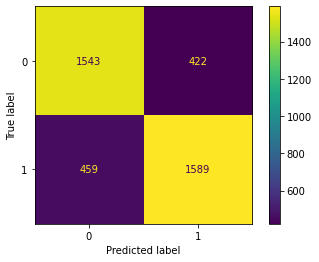

-------------------------------------------------------
Naive Bayes
              precision    recall  f1-score   support

           g       0.58      0.88      0.70      1965
           h       0.78      0.39      0.52      2048

    accuracy                           0.63      4013
   macro avg       0.68      0.64      0.61      4013
weighted avg       0.68      0.63      0.61      4013



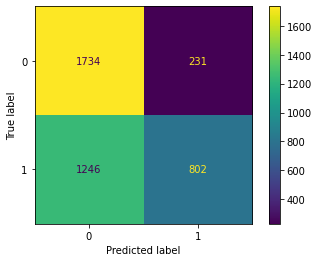

In [6]:
classifications = [decisionTree, naiveBayes]
for classification in classifications:
  classification(x_train, x_test, y_train, y_test)